In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#data loading

TSLA = pd.read_csv("TSLA.csv")

In [9]:
TSLA.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


Text(0, 0.5, 'Adj Close Price USD ($)')

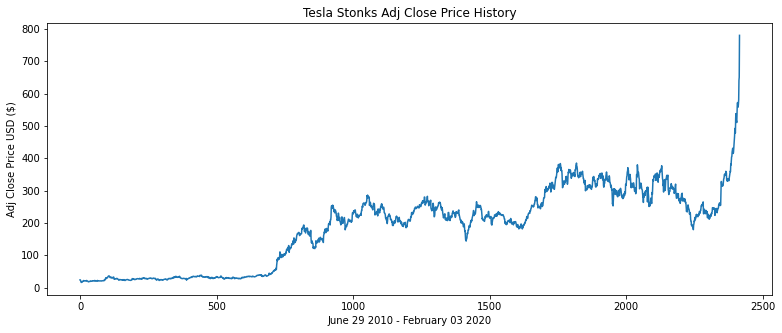

In [12]:
#visualize 
plt.figure(figsize=(13, 5))
plt.plot(TSLA["Adj Close"], label = "Tesla")
plt.title("Tesla Stonks Adj Close Price History")
plt.xlabel("June 29 2010 - February 03 2020")
plt.ylabel("Adj Close Price USD ($)")

In [17]:
#Create SMA30 
SMA30 = pd.DataFrame()
SMA30["Adj Close"] = TSLA["Adj Close"]. rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2411,469.665002
2412,477.085002
2413,485.728668
2414,494.781335


In [18]:
#SMA 100
SMA100 = pd.DataFrame()
SMA100["Adj Close"] = TSLA["Adj Close"]. rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2411,343.527601
2412,347.041701
2413,351.175301
2414,355.363101


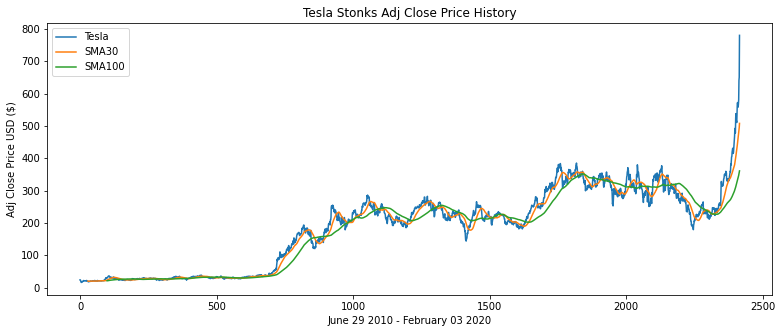

In [21]:
#plot sma
#visualize 
plt.figure(figsize=(13, 5))
plt.plot(TSLA["Adj Close"], label = "Tesla")
plt.plot(SMA30["Adj Close"], label = "SMA30")
plt.plot(SMA100["Adj Close"], label = "SMA100")
plt.title("Tesla Stonks Adj Close Price History")
plt.legend(loc="upper left")
plt.xlabel("June 29 2010 - February 03 2020")
plt.ylabel("Adj Close Price USD ($)")
plt.show()

In [22]:
# combine into new dataset
data = pd.DataFrame()
data["TSLA"] = TSLA["Adj Close"]
data["SMA30"] = SMA30["Adj Close"]
data["SMA100"] = SMA100["Adj Close"]
data

,TSLA,SMA30,SMA100
0,23.889999,NaN,NaN
1,23.830000,NaN,NaN
2,21.959999,NaN,NaN
3,19.200001,NaN,NaN
4,16.110001,NaN,NaN
...,...,...,...
2411,566.900024,469.665002,343.527601
2412,580.989990,477.085002,347.041701
2413,640.809998,485.728668,351.175301
2414,650.570007,494.781335,355.363101


In [50]:
def buy_or_sell(data):
    signalbuy = []
    signalsell = []
    flag = -1
    
    for i in range(len(data)):
        if data["SMA30"][i]>data["SMA100"][i]:
            if flag != 1:
                signalbuy.append(data["TSLA"][i])
                signalsell.append(np.nan)
                flag = 1
            else:
                signalbuy.append(np.nan)
                signalsell.append(np.nan)
        elif data["SMA30"][i] < data["SMA100"][i]:
            if flag != 0:
                signalbuy.append(np.nan)
                signalsell.append(data["TSLA"][i])
                flag = 0
            else:
                signalbuy.append(np.nan)
                signalsell.append(np.nan)
        else:
            signalbuy.append(np.nan)
            signalsell.append(np.nan)
    return (signalbuy, signalsell)           
                
                

In [51]:
#store signal

buy_sell = buy_or_sell(data)
data["Buy_Signal_Price"] = buy_sell[0]
data["Sell_Signal_Price"] = buy_sell[1]


In [52]:
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,23.889999,NaN,NaN,NaN,NaN
1,23.830000,NaN,NaN,NaN,NaN
2,21.959999,NaN,NaN,NaN,NaN
3,19.200001,NaN,NaN,NaN,NaN
4,16.110001,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2411,566.900024,469.665002,343.527601,NaN,NaN
2412,580.989990,477.085002,347.041701,NaN,NaN
2413,640.809998,485.728668,351.175301,NaN,NaN
2414,650.570007,494.781335,355.363101,NaN,NaN


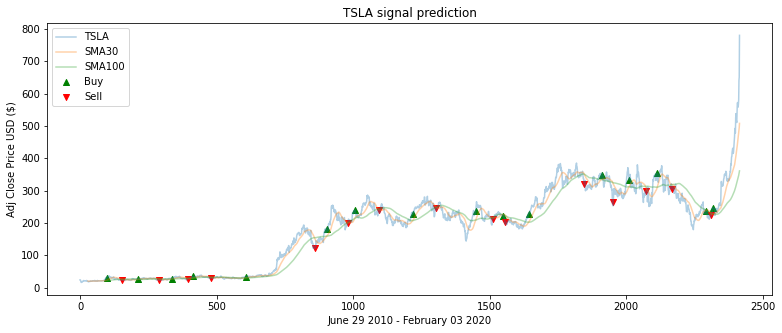

In [53]:
#Stonks time
plt.figure(figsize=(13, 5))
plt.plot(data["TSLA"], label = "TSLA", alpha = 0.35)
plt.plot(data["SMA30"], label = "SMA30", alpha = 0.35)
plt.plot(data["SMA100"], label = "SMA100", alpha = 0.35)
plt.scatter(data.index, data["Buy_Signal_Price"], label="Buy", marker="^", color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"], label="Sell", marker="v", color = "red")
plt.title("TSLA signal prediction")
plt.xlabel("June 29 2010 - February 03 2020")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()